In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob 

0.CC10.jpg


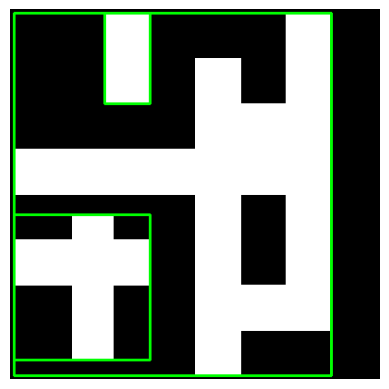

Processed image saved to: ./0.CC10.jpg-output.png
0.CC1.png


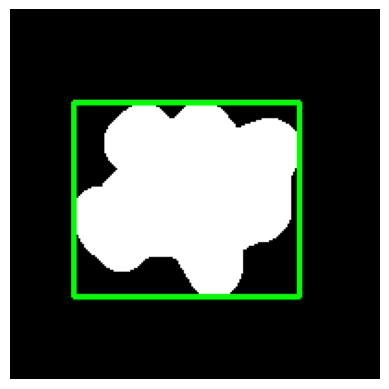

Processed image saved to: ./0.CC1.png-output.png
0.CC2.png


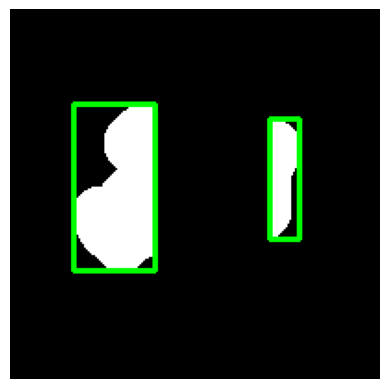

Processed image saved to: ./0.CC2.png-output.png
0.CC3.png


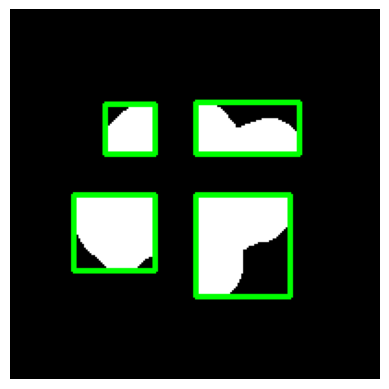

Processed image saved to: ./0.CC3.png-output.png
0.CC4.png


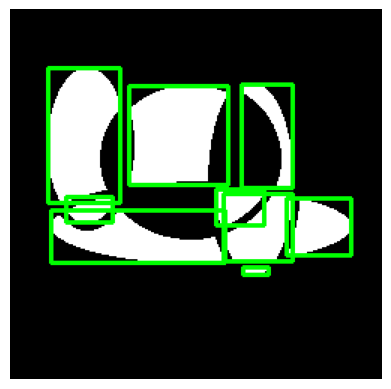

Processed image saved to: ./0.CC4.png-output.png
0.CC5.png


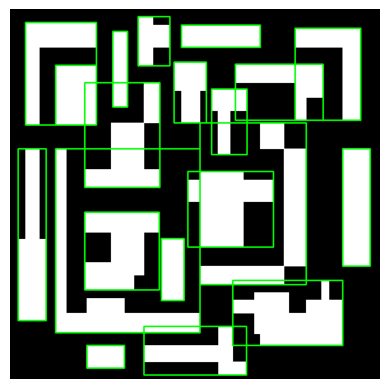

Processed image saved to: ./0.CC5.png-output.png
0.CC6.png


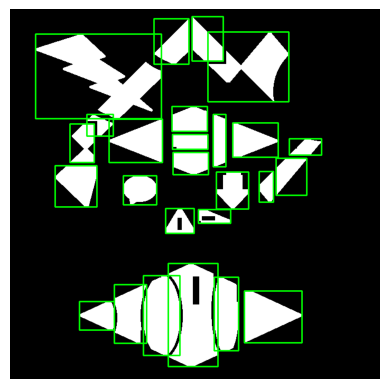

Processed image saved to: ./0.CC6.png-output.png
0.CC8.png


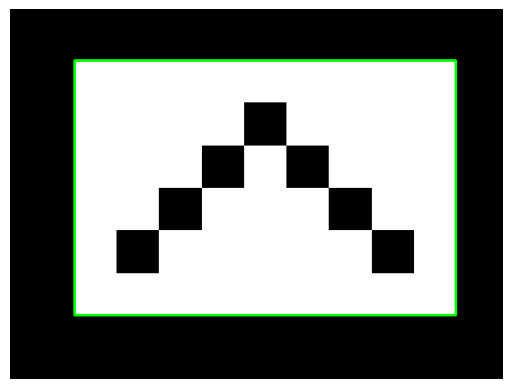

Processed image saved to: ./0.CC8.png-output.png
0.CC9.png


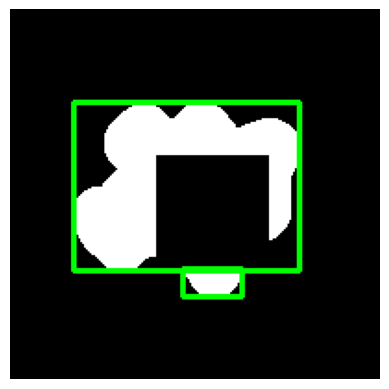

Processed image saved to: ./0.CC9.png-output.png
0.CC7.tif


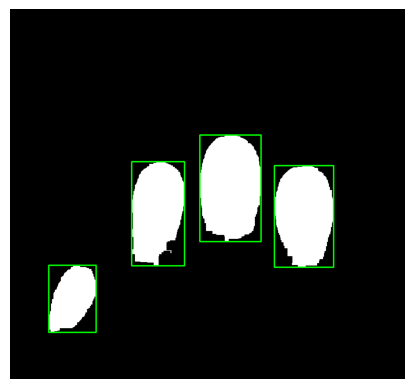

Processed image saved to: ./0.CC7.tif-output.png


In [10]:
# Path to folder
folder_path = "./images"

# Supported image formats
image_extensions = ["jpg", "jpeg", "png", "bmp", "tif"]

# Loop through all image files
for ext in image_extensions:
    for image_path in glob.glob(os.path.join(folder_path, f"*.{ext}")):
        file_name = os.path.basename(image_path) 
        print(file_name)
        # Read the image
        image = cv2.imread(image_path)

        if image is not None:
           image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Automatically determine if objects are black or white
           white_pixels = np.count_nonzero(image == 255)
           black_pixels = np.count_nonzero(image == 0)

            # If background is white (more white pixels), invert the image
           if white_pixels > black_pixels:
                _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
           else:
                _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

            # Get image dimensions
           height, width = binary.shape

            # Initialize label matrix and visited matrix
           labels = np.zeros((height, width), dtype=int)
           visited = np.zeros((height, width), dtype=bool)

            # Define 4-connectivity
           def get_neighbors(x, y):
                neighbors = [
                    (x - 1, y - 1), (x - 1, y), (x - 1, y + 1),
                    (x, y - 1),                 (x, y + 1),
                    (x + 1, y - 1), (x + 1, y), (x + 1, y + 1)
                ]
                return [(nx, ny) for nx, ny in neighbors if 0 <= nx < height and 0 <= ny < width]

            # DFS function for connected component labeling
           def dfs(x, y, label):
                stack = [(x, y)]
                component = []

                while stack:
                    cx, cy = stack.pop()

                    if not visited[cx, cy] and binary[cx, cy] == 255:
                        visited[cx, cy] = True  # visited 
                        labels[cx, cy] = label
                        component.append((cx, cy))
                        for nx, ny in get_neighbors(cx, cy):
                            if not visited[nx, ny] and binary[nx, ny] == 255:
                                stack.append((nx, ny))

                return component

            # Find connected components using DFS
           components = []
           label = 1
           for i in range(height):
                for j in range(width):
                    if binary[i, j] == 255 and not visited[i, j]:
                        component = dfs(i, j, label)
                        if component:
                            components.append(component)
                            label += 1

           output_image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

            # Compute bounding boxes
           for component in components:
                x_coords = [p[0] for p in component]
                y_coords = [p[1] for p in component]

                # Bounding box
                x_min, x_max = min(x_coords), max(x_coords)
                y_min, y_max = min(y_coords), max(y_coords)

                # Draw bounding box (Green)
                cv2.rectangle(output_image, (y_min, x_min), (y_max, x_max), (0, 255, 0), 2)

            # Show the output
           plt.imshow(output_image)
           plt.axis('off')
           plt.show()

           output_path = f"./{file_name}-output.png"
           cv2.imwrite(output_path, output_image)
           print(f"Processed image saved to: {output_path}")
        else:
            print(f"Error loading {image_path}")

cv2.destroyAllWindows()
